# Introduction

The _objectives_ in the following `Notebook` are:

- To understand the data given in the form of problem statement.
- To clean and preprocess the data for analysis and understanding.
- To perform EDA and understand the `variables` involved in prediction



__Some important points:__
- For solving this problem we will be following the steps discussed in the NB and for explaining the observation `boxes` will be used
- `class` function __viz.py__ is used with all utilities and the scripts and is  imported as .py for data cleaning to avoid repeat action of code.

In [1]:
# run the libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%run viz.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# read the data and see it....
df = pd.read_csv('Stainless-Steel-Prices-Forecasty-Assignment.csv')
df.head()

Date  StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
0   7/1/2013             0.827352                  20575               10568   
1   8/1/2013             0.760221                  20609               10821   
2   9/1/2013             0.784715                  20761               10774   
3  10/1/2013             0.769293                  20735               11291   
4  11/1/2013             0.750242                  20854               11559   

   IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
0          127.191304                 82.222360    227.022942   
1          137.055000                 82.221429    232.234194   
2          134.185714                 83.295918    234.335594   
3          132.572727                 85.443634    229.393932   
4          136.323810                 88.363265    225.437049   

   Nickel_Global_USD  Zinc_Global_USD  Freight_Transport_Index  \
0        13750.31522      1837.619565                     -0.4   
1        14308.26190      1896.392857                      0.5   
2        13801.39286      1846.880952                      0.1   
3        14117.65217      1884.836957                     -0.1   
4        13684.01190      1866.416667                      2.1   

   WTI_Crude_Global_USD  Baltic_Dry_Index  BCI_China  BCI_Europe    BCI_US  \
0            104.545217              1062   98.80018    99.64265  100.1044   
1            106.546364              1132   99.04874    99.91766  100.3962   
2            106.313809              2003   99.27196   100.18490  100.5363   
3            100.500435              1504   99.40488   100.36330  100.5771   
4             93.812381              1821   99.36221   100.49830  100.5459   

   CLI_China  CLI_Europe    CLI_US  PMI_US_Manufacturing  Copper_Global_USD   
0   101.1423    99.43615  100.6230                  50.9             6906.64  
1   101.1938    99.64082  100.6545                  55.4             7186.25  
2   101.2066    99.84383  100.6646                  55.7             7159.27  
3   101.1835   100.02300  100.6666                  56.2             7203.02  
4   101.1283   100.17150  100.6744                  56.4             7070.65

## Understanding the data

>The data contains information about `Stainless Steel Price` at various different time interval along with information about Inventory, Orders and  other important metrics.

- Some important metrics to be understood:

1. __BCI__: Business Confidence Index indicates expectations of firms, based upon surveys on production, orders, and finished goods in the sector
2. __CLI__: Composite Leading Indicator is designed to provide early signals of turning points in business cycles showing fluctuation of the economic activity around its long term potential level. 
3. __PMI__: Purchasing Managers Index are economic indicators derived from monthly surveys of private sector companies
4. __Energy Index__ : Energy Index is a modified market capitalization-weighted index designed to track the performance of companies that are manufacturers, developers, distributors, and/or installers of clean-energy technologies.

Our job is to predict `Stainless Steel Price` with different modelling approach

## Data Cleaning

In this part we will perform, following tasks:

1. Convert the data into proper format.


2. Replace missing values.


3. Perform visualisation to select features which are relevant for modelling.

In [3]:
# Convert it into proper datetime format
df['Date']   = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Get the days, months and years
df['Day']    = [i.strftime('%A') for i in df['Date']]
df['Month']  = [i.strftime('%m') for i in df['Date']]
df['Year']   = [i.strftime('%Y') for i in df['Date']]

In [4]:
# let us see the data first
d = description(df)
d.data_description(summary = True)

The number of points in this data is 84 

The shape of the data is (84, 23) 

Let's see the data : 

The summary of data set is : 
       StainlessSteelPrice  Steel_Inventory_M_USD  Steel_Orders_M_USD  \
count            84.000000              84.000000           84.000000   
mean              0.810715           20070.559524         9831.595238   
std               0.143444            1764.033210         1240.333905   
min               0.499859           16688.000000         7650.000000   
25%               0.743778           18980.000000         8904.000000   
50%               0.812157           20190.000000         9947.000000   
75%               0.893690           21458.500000        11062.500000   
max               1.075014           23464.000000        11825.000000   

       IronOre_Global_USD  CoalAustralia_Global_USD  Energy_Index  \
count           84.000000                 84.000000     84.000000   
mean            79.962940                 81.844151    143.408951   
std 

In [5]:
# sort the df by order
df = df.sort_values(by=['Year','Day','Month'], ascending=True)

In [6]:
# let us visualise some features
d = visualisation(df.iloc[:,1:])

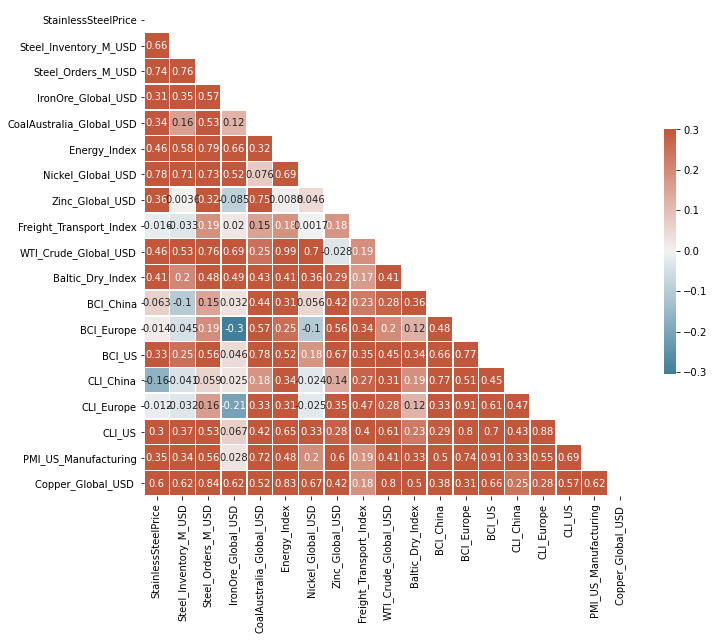

In [7]:
## lets see the heat map of variables
d.heat_map()

> As there could be <code style="background:yellow;color:red">high multicollinearity</code>in the data we need to drop those columns based on our  __coorelation score.__

Function `high_coorelations` has been created in .py script for this which removes columns based on our set threshold.

In [8]:
# print the col names and drop it
d = df.drop(columns = high_coorelations(df, cut_off = 0.85))

['WTI_Crude_Global_USD', 'CLI_Europe', 'CLI_US', 'PMI_US_Manufacturing']


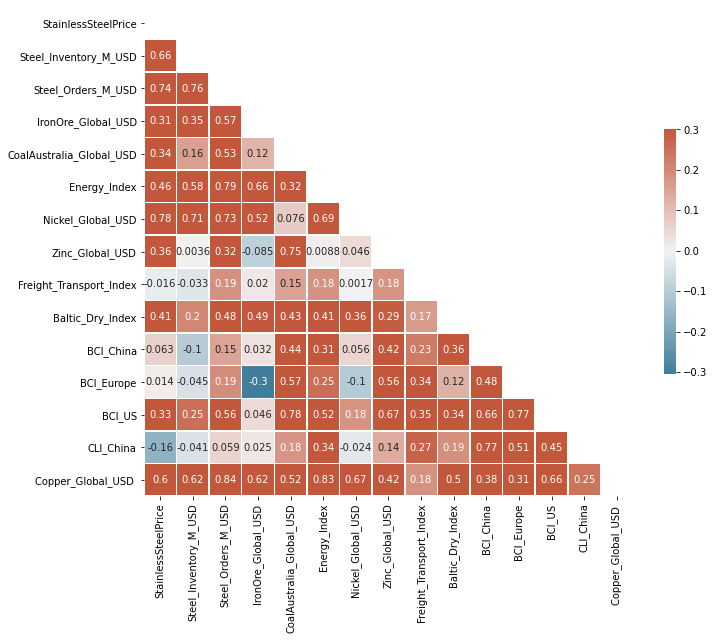

In [9]:
# let us see again....
v = visualisation(d.iloc[:,1:])
v.heat_map()

Much better coorelation plot with relational values which are not so much coorelated

<Figure size 1200x400 with 0 Axes>

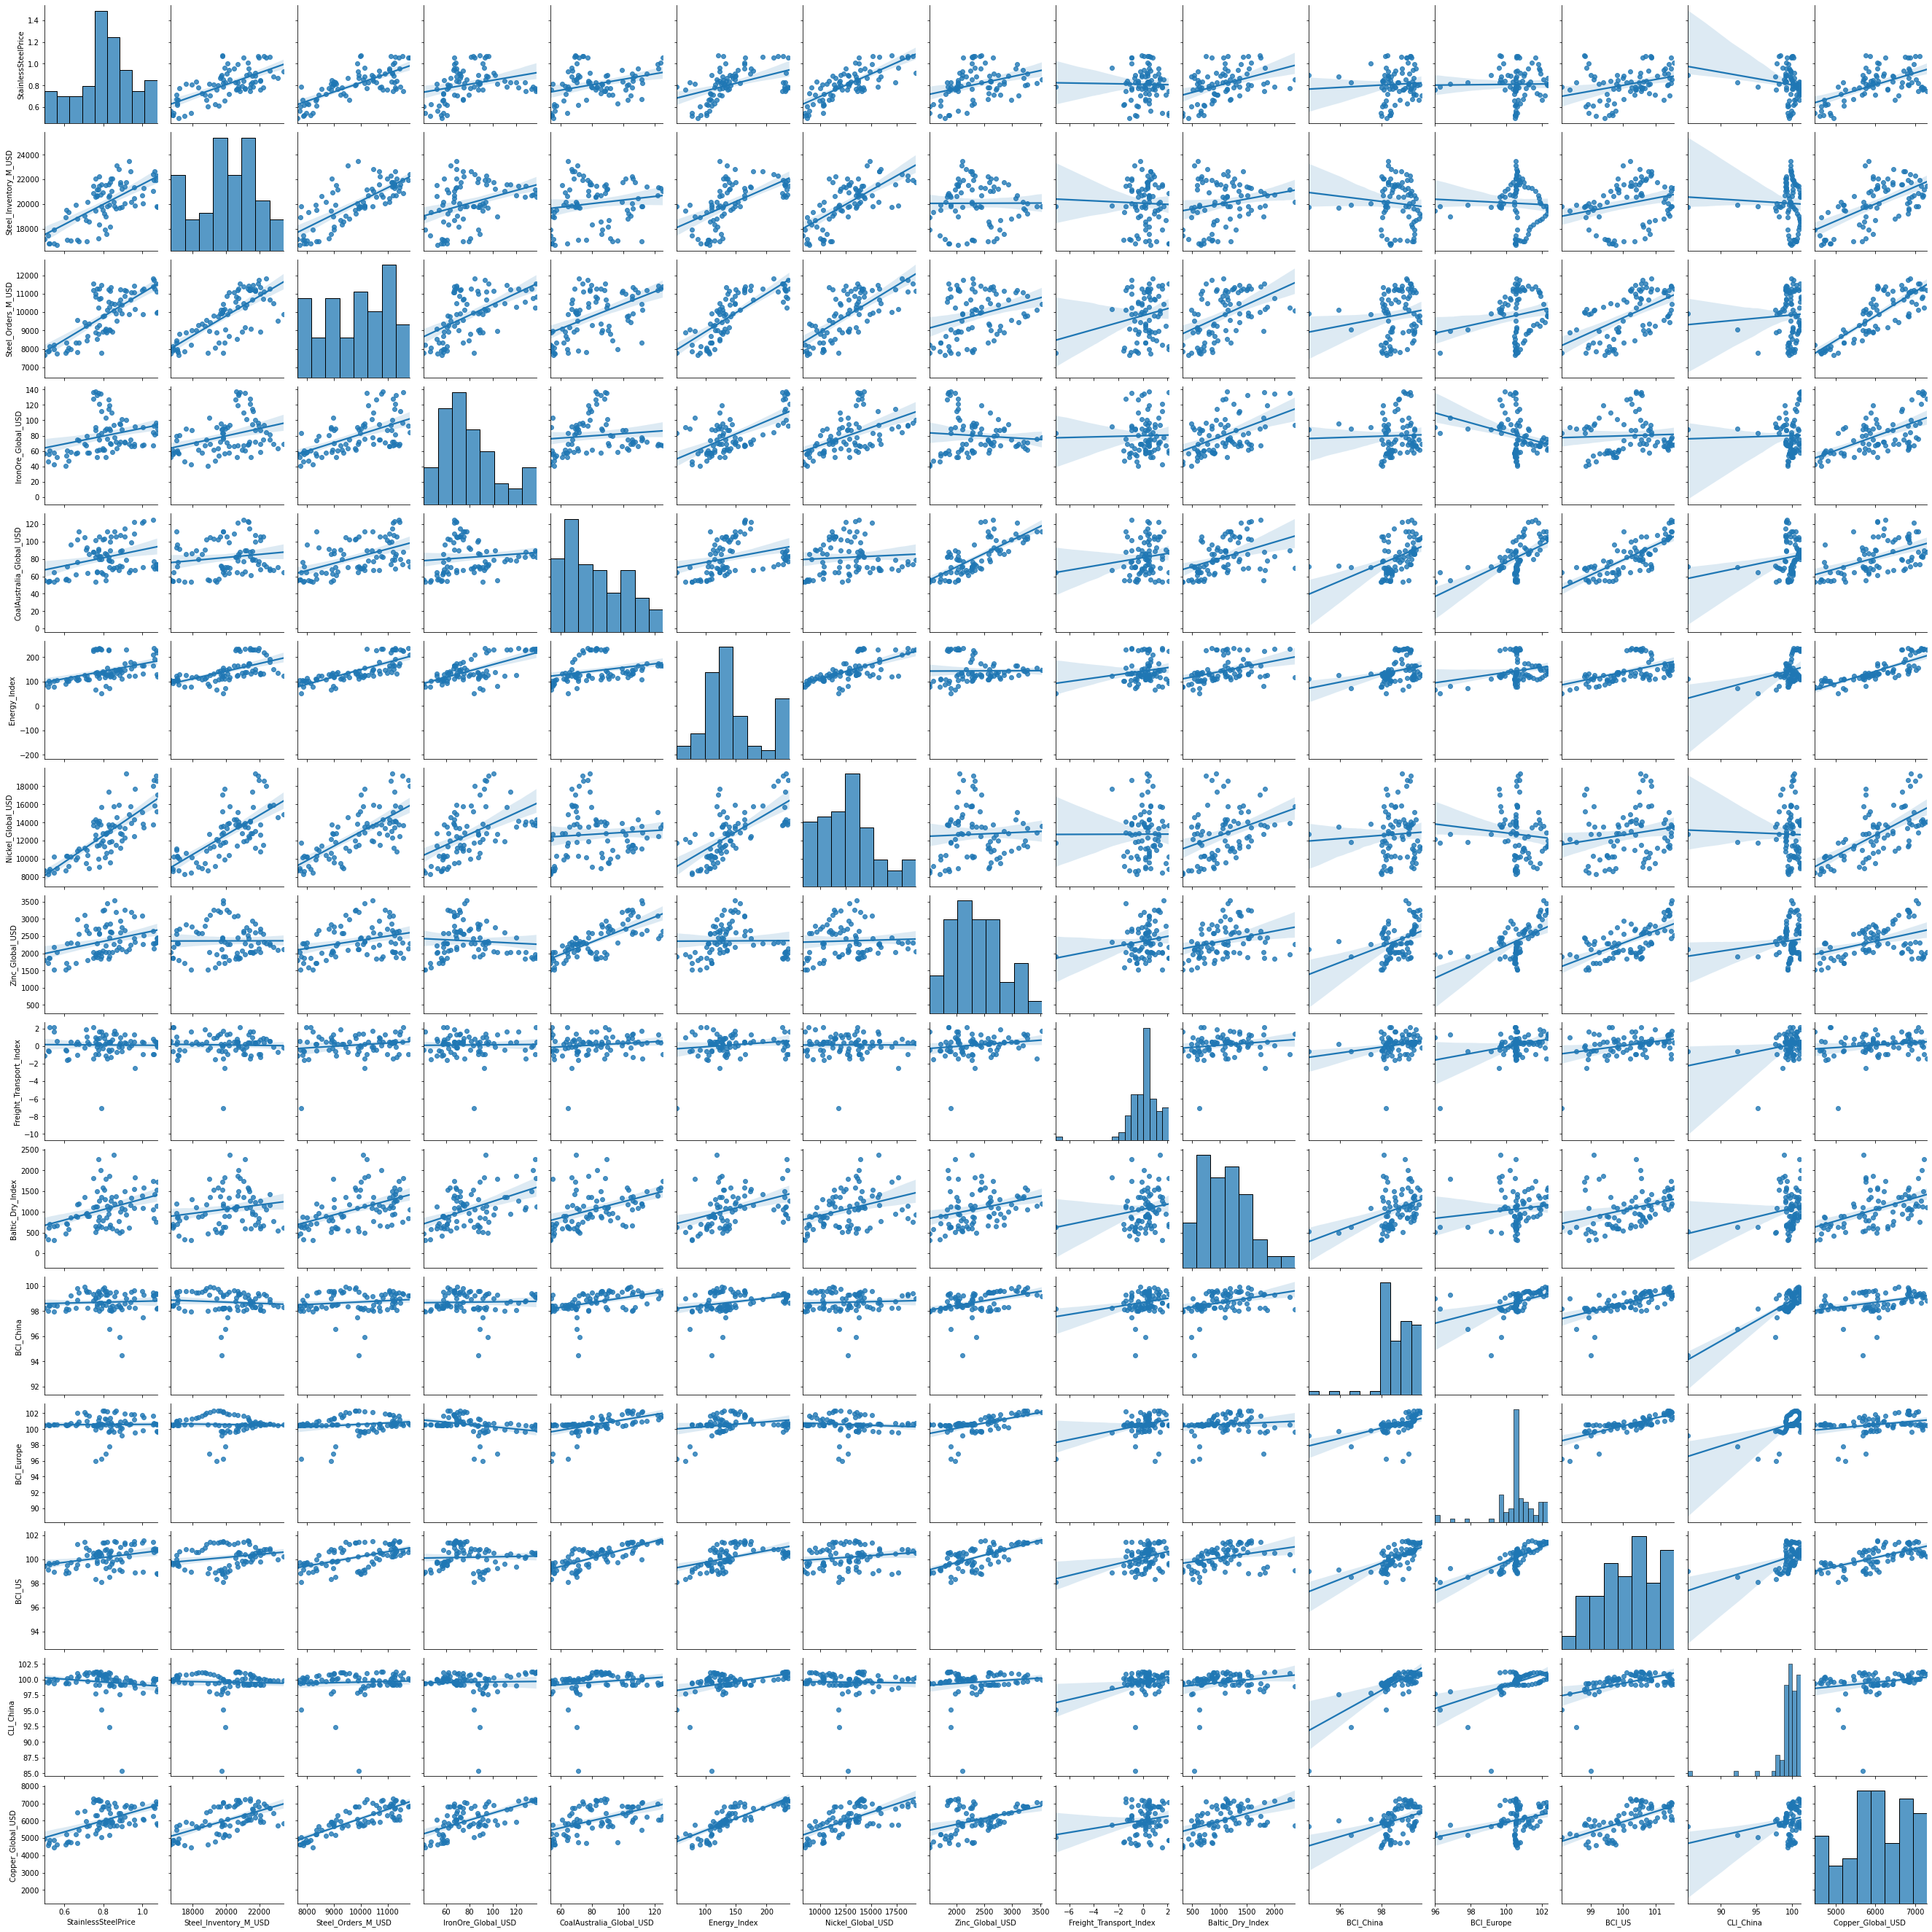

In [10]:
## let see the distribution of data
v.pair_plot()

We see some of the columns<code style="background:yellow;color:black"> outliers</code>have which have some points which needs to be preprocessed. Lets make a list of those columns

In [11]:
## list of columns
outlier_col = ['Freight_Transport_Index','BCI_China','BCI_Europe','CLI_China']

In [12]:
## let us use our z score detector whih we created in library
index = []
for col in outlier_col:
     ind = detect_outliers_zscore(d[col].values, threshold = 3)
     print(ind)
     index.extend(ind)

## remove duplicate lements
index = list(set(index))

The outliers found in your data are 1
[83]
The outliers found in your data are 2
[80, 82]
The outliers found in your data are 3
[78, 79, 83]
The outliers found in your data are 2
[80, 81]


Lets drop these three points which show outliers there are 5 indexes

## Exploratory Data Analysis

In [13]:
## dropping using indexes
d = d.drop(d.index[index])
## instantiate for viz

viz = visualisation(d)

### Steel Price With Time

Let us see how the __Steel Price__ gets affected with Time and other factors involved

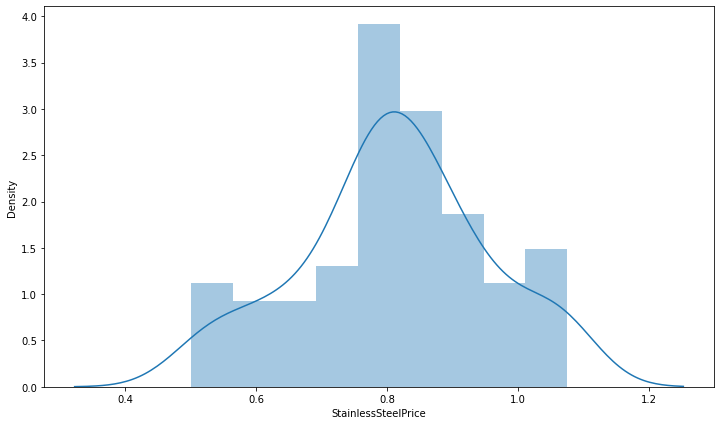

In [14]:
## let see the distribution of target variable
v.density_plot(x = 'StainlessSteelPrice')

In [15]:
## lets check time series with date
visualisation(df).line_plot('Date','StainlessSteelPrice')

In [16]:
## lets see the proces at each specific time interval
v.box_plot('Day','StainlessSteelPrice')
v.box_plot('Month','StainlessSteelPrice')

<div class="alert alert-block alert-warning">

__Observations:__
    
1. The price of Steel is normally distributed and shows a trend of `seasonality`.
    
2. The box-plots show there are significant outliers in the form of noise
    
</div>

### Latent factors in Steel Prices

In [17]:
## with highest coorelation variable
v.line_plot('Nickel_Global_USD','StainlessSteelPrice')

<div class="alert alert-block alert-warning">

The following observation shows us that price of nickel __strongly influences steel price__ as nickel is added in steel (domain knowledge). There are some residual involved in this relation.
    
</div>

> Is there any coorelation between `Orders` in steel and `Steel Price` as a matter of __Demand Supply Rule?__

In [18]:
v.line_plot('Steel_Orders_M_USD','StainlessSteelPrice')

<div class="alert alert-block alert-warning">

Although it is not exactly a linear relationship there is some definite coorrelation between them.
    
</div>

## Modelling

In [19]:
## save the cleaned data
df.to_csv('regression_features.csv', index=False)

<div class="alert alert-block alert-success">
<b>Success:</b> Lets now move towards Modelling and try to predict Steel Prices with different approaches
</div>